## Imports and Utility

In [22]:
import tweepy
import sys
import jsonpickle
import json
import os
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline
#nltk.download()

def saveTweets(query,max_tweets):
    with open('_'.join(query)+'.json', 'w') as f:
        tweets = []
        last_id = -1
        while len(tweets) < max_tweets:
            count = max_tweets - len(tweets)
            try:
                new_tweets = api.search(q=query, count=count, max_id=str(last_id - 1),tweet_mode='extended')
                if not new_tweets:
                    break
                tweets.extend(new_tweets)
                last_id = new_tweets[-1].id
            except tweepy.TweepError as e:
                print(str(e))
                break
        for tweet in tweets:
            f.write(jsonpickle.encode(tweet._json, unpicklable=False) +'\n')
        return True

def loadTweets(query):
    with open('_'.join(query)+'.json', 'r') as f:
        data = f.readlines()
        return [json.loads(i) for i in data]
    
def get_words(twts):
    rawtext = ' '.join([t['full_text'] for t in twts]).lower()
    words = re.sub(r'[^a-zA-Z#\s]', '', rawtext).split()
    sw = nltk.corpus.stopwords.words('english')
    sw.extend(['rt','&amp;'])
    sw.extend(' '.join(query).split())
    return [w for w in words if w not in sw]

## Get tweets

In [2]:
query = ['Data Science','Data Scientist','data science','data scientist']

In [3]:
with open ("auth.txt", "r") as f:
    cred=f.readlines()
cred = [i.rstrip() for i in cred]
    
auth = tweepy.AppAuthHandler(cred[0],cred[1])
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
saveTweets(query,5000)

True

In [4]:
tweets = loadTweets(query)
print('Total tweets:',len(tweets))

Total tweets: 1280


## Retweets

In [5]:
retweets = [i for i in tweets if i['retweeted'] or 'RT @' in i['full_text']]
origtweets = [i for i in tweets if 'RT @' not in i['full_text']]
print('Total retweets:',len(retweets))
print('Total original tweets:',len(origtweets))
if len(retweets)+len(origtweets) != len(tweets):
    print('Error! Calculated total:',len(retweets)+len(origtweets),'Actual Total:',len(tweets))

Total retweets: 762
Total original tweets: 518


## Word frequencies

In [19]:
top = nltk.FreqDist(get_words(tweets)).most_common(20)
top_orig = nltk.FreqDist(get_words(origtweets)).most_common(20)

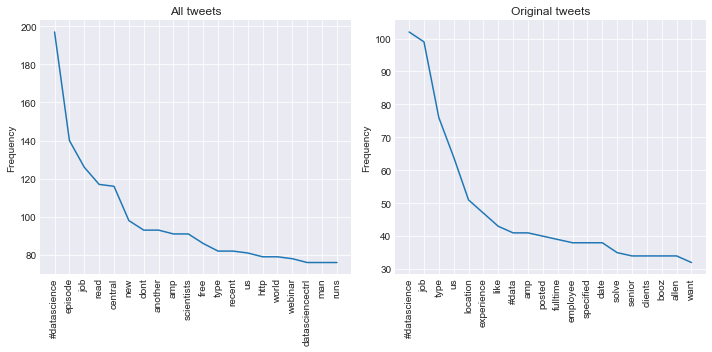

In [21]:
# All tweets
f = plt.figure(figsize=(10,5))

ax1=f.add_subplot(1,2,1)
x = [i[0] for i in top]
y = [i[1] for i in top]
ax1.plot(x, y)
plt.xticks(rotation=90);
ax1.set_ylabel('Frequency')
ax1.set_title('All tweets')

ax2=f.add_subplot(1,2,2)
xo = [i[0] for i in top_orig]
yo = [i[1] for i in top_orig]
ax2.plot(xo, yo)
plt.xticks(rotation=90);
ax2.set_ylabel('Frequency')
ax2.set_title('Original tweets')

f.tight_layout()